# 1. Notebook: Mean, Median, Mode, Standard Deviation,Variance & Confidence Interval

In this notebook, we will calculate the mean, median, mode, standard deviation, variance and confidence interval for the age value of our dataset.

First we will import the libraries we will use:

In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt

Then we will read our dataset csv file and see the columns inside. 
In the 'UCI Heart Disease Data - Column Descriptions.txt' you can find the description of its column

In [2]:
df = pd.read_csv('heart_disease_uci.csv')
dataset_columns = df.columns.tolist()
dataset_columns

['id',
 'age',
 'sex',
 'dataset',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'num']

Let's calculate the mean,median,mode,standard deviation and variance of the 'age' and visualize them

In [3]:
age_mean = df['age'].mean()
age_median = df['age'].median()
age_mode = df['age'].mode()[0] # Mode can be multi-modal, hence we select the first one
age_std = df['age'].std()
age_variance = df['age'].var()

# Plot for the mean of 'age'

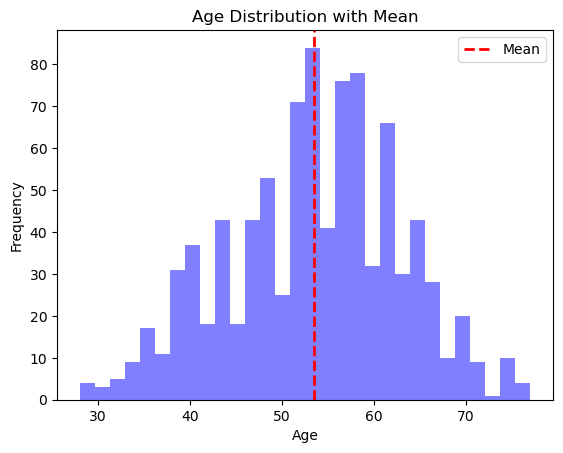

In [4]:
plt.figure()
plt.hist(df['age'], bins=30, alpha=0.5, color='blue')
plt.axvline(age_mean, color='red', linestyle='dashed', linewidth=2)
plt.title('Age Distribution with Mean')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(['Mean'])
plt.show()

Mean: The mean is the average of all numbers in a dataset. You calculate it by adding up all the values and then dividing by the number of values. It gives a good overall idea of the set's numerical center, but it can be skewed by unusually high or low values.

# Plot for the median of 'age'

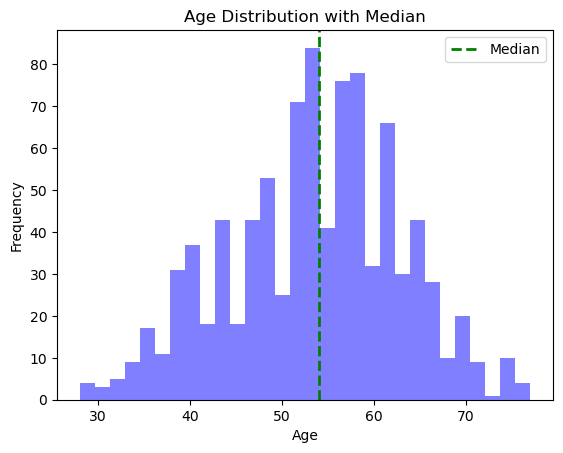

In [5]:
plt.figure()
plt.hist(df['age'], bins=30, alpha=0.5, color='blue')
plt.axvline(age_median, color='green', linestyle='dashed', linewidth=2)
plt.title('Age Distribution with Median')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(['Median'])
plt.show()

Median: The median is the middle value in a dataset when it is arranged in numerical order. If there's an odd number of observations, it's the middle one; if there's an even number, it's the average of the two middle numbers. The median is useful as a measure of central tendency when the data is skewed or has outliers, as it is not influenced by extreme values.

# Plot for the mode of 'age'

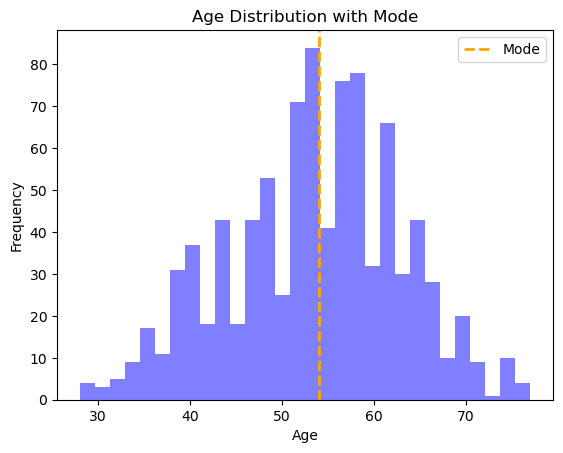

In [6]:
plt.figure()
plt.hist(df['age'], bins=30, alpha=0.5, color='blue')
plt.axvline(age_mode, color='orange', linestyle='dashed', linewidth=2)
plt.title('Age Distribution with Mode')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(['Mode'])
plt.show()

Mode: The mode is the most frequently occurring value in a dataset. There can be one mode, more than one (bimodal or multimodal), or none at all if no number repeats. The mode is particularly useful for categorical data where you want to know which is the most common category.

# Plot for the standard deviation of 'age'

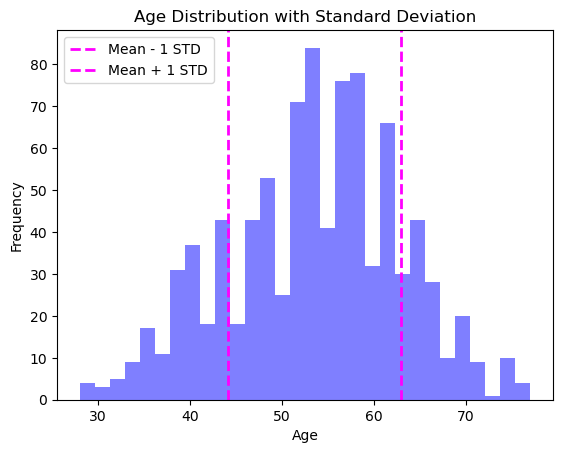

In [7]:
plt.figure()
plt.hist(df['age'], bins=30, alpha=0.5, color='blue')
plt.axvline(age_mean - age_std, color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(age_mean + age_std, color='magenta', linestyle='dashed', linewidth=2)
plt.title('Age Distribution with Standard Deviation')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(['Mean - 1 STD', 'Mean + 1 STD'])
plt.show()

Standard Deviation: Standard deviation measures how spread out the numbers in a dataset are around the mean. A low standard deviation means that the data points tend to be very close to the mean, while a high standard deviation means that the data points are spread out over a wider range of values. It provides a clear sense of the dataset's variability. "Mean - 1 STD" refers to the value that is one standard deviation below the mean. Similarly, "Mean + 1 STD" is the value one standard deviation above the mean. This range is significant because, for a normal distribution, approximately 68% of the data within a dataset will fall within one standard deviation of the mean.

# Plot for the variance of 'age'

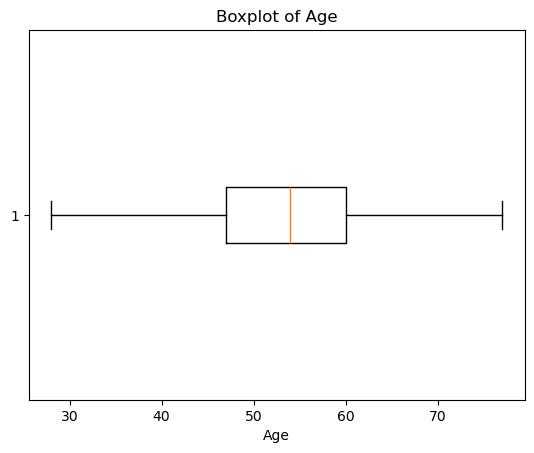

In [8]:
plt.figure()
plt.boxplot(df['age'], vert=False)
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

#The y-axis doesn’t represent a variable from the dataset. 
#Instead, it simply provides a baseline to display the boxplot horizontally. 

Variance: Variance measures the average degree to which each point differs from the mean. In other words, it's the average of the squared differences from the Mean. Higher variance indicates that the data points are more spread out from the mean, and lower variance indicates that they are closer to the mean. Variance is the square of the standard deviation.

# Calculate the Confidence Interval for the Mean Age

Now we will calculate and interpret a 95% confidence interval for the mean age

In [9]:
n = len(df['age'])

# z-score for a 95% confidence level
z = stats.norm.ppf(0.975)  # two-tailed (0.025 + 0.975)

# Margin of error
margin_error = z * (age_std / np.sqrt(n))

# Confidence interval
ci_lower = age_mean - margin_error
ci_upper = age_mean + margin_error

print("The 95% confidence interval for the mean age is: [{}, {}]".format(ci_lower, ci_upper))

The 95% confidence interval for the mean age is: [52.901864323317746, 54.119874807117036]


# Create a bar plot with error bars to visualize it

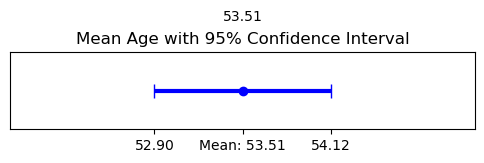

In [10]:
plt.figure(figsize=(6, 1))  # Compact visualization
plt.errorbar(age_mean, 0, xerr=margin_error, fmt='o', color='blue', elinewidth=3, capsize=5)
plt.text(age_mean, 0.1, f'{age_mean:.2f}', ha='center')  # Center align text
plt.xticks([ci_lower, age_mean, ci_upper], [f'{ci_lower:.2f}', f'Mean: {age_mean:.2f}', f'{ci_upper:.2f}'])
plt.yticks([])  # Hide y axis
plt.xlim(ci_lower - 1, ci_upper + 1)  # Ensure CI is within view
plt.title('Mean Age with 95% Confidence Interval')
plt.show()

Confidence Interval: A confidence interval (CI) is a range of values used to estimate the true value of a population parameter, such as the average or mean. It is calculated from sample data and is typically expressed at a 95% confidence level. This means we can be 95% confident that the interval contains the true parameter. In simpler terms, if we were to take 100 different samples and compute a CI for each, we would expect about 95 of those intervals to include the true value.
